In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt

btc_data = pd.read_csv('../btc.csv')

In [33]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a target label column named 'target' in your DataFrame
label_encoder = LabelEncoder()
btc_data['Class'] = label_encoder.fit_transform(btc_data['Class'])

# Get the mapping between the encoded labels and the original classes
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for encoded_label, original_class in label_mapping.items():
    print(f"Encoded Label: {encoded_label} --> Original Class: {original_class}")
    
btc_data

Encoded Label: 0 --> Original Class: decrease
Encoded Label: 1 --> Original Class: increase


,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,243,2013-12-27 00:00:00,453.087000,5.519257e+09,3.880170e+07,-2.81,18.81,0
1,244,2013-12-28 00:00:00,443.243500,5.401144e+09,1.687134e+07,-2.17,18.88,0
2,245,2013-12-29 00:00:00,451.859600,5.507909e+09,1.680521e+07,1.94,19.45,1
3,246,2013-12-30 00:00:00,457.693700,5.579252e+09,1.487517e+07,1.29,11.18,1
4,247,2013-12-31 00:00:00,457.389300,5.575541e+09,1.326663e+07,-0.07,12.12,0
...,...,...,...,...,...,...,...,...
3394,3706,2023-06-22 00:00:00,23571.096637,4.573319e+11,1.860305e+10,6.20,18.93,1
3395,3707,2023-06-23 00:00:00,23483.066477,4.561086e+11,1.538576e+10,-0.37,17.46,0
3396,3708,2023-06-24 00:00:00,24090.972707,4.675910e+11,1.780004e+10,2.59,17.35,1
3397,3709,2023-06-25 00:00:00,24019.061630,4.663461e+11,9.230869e+09,-0.30,16.23,0


In [34]:
selected_columns= btc_data.iloc[:, [2, 3, 4, 5, 6, 7]]

# Split the data into features (X) and target label (y)
X= selected_columns.iloc[:, :-1]  # Features (columns 2, 3, 4)
y= selected_columns.iloc[:, -1]   # Target label (column 7)# Standardize the data

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [36]:
#NB MODEL
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.model_selection import cross_val_score

# Initialize the base classifier (naive Bayes in this case)
base_classifier = GaussianNB()

# Initialize the AdaBoost classifier
boosted_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=64, random_state=42)

# Train the boosted classifier
boosted_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = boosted_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(boosted_classifier, X_normalized, y, cv=10)  # 5-fold cross-validation

# Print the cross-validation scores
print("\nCross-Validation Scores:\n", cv_scores)
print("\nMean Accuracy:", np.mean(cv_scores))

Accuracy: 0.942156862745098


/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensembl


Cross-Validation Scores:
 [0.89411765 0.93235294 0.84705882 0.94117647 0.97941176 0.92647059
 0.97941176 0.95588235 0.77352941 0.63716814]

Mean Accuracy: 0.8866579906298802


/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


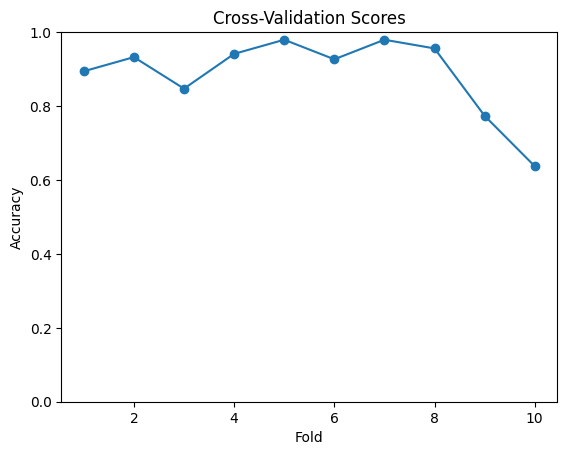

In [38]:
# Plot the cross-validation scores
plt.plot(np.arange(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

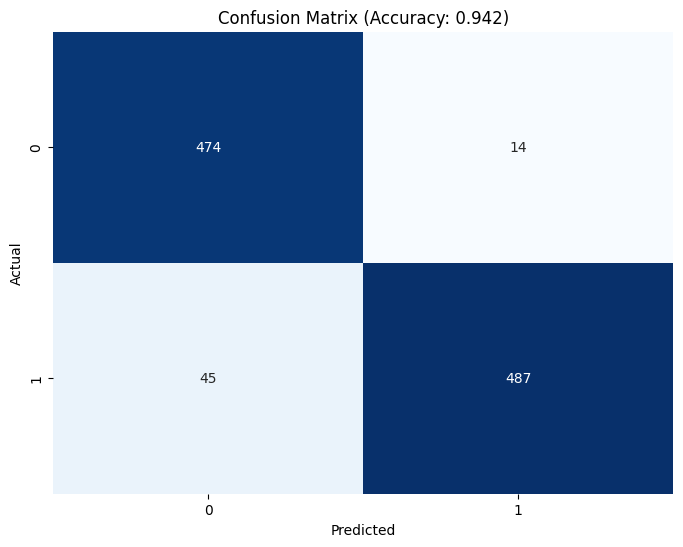

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have predicted labels stored in y_pred and true labels stored in y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted labels stored in y_pred and true labels stored in y_test

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')


Precision: 0.944
Recall: 0.942
F1 Score: 0.942
